In [1]:
import pandas as pd
import numpy as np
#đọc dữ liệu từ file
df = pd.read_csv("E:\Jupyter NoteBook\XGBoost\product_train.csv")
dataset=df.values

In [2]:
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3921548,8,12,0,0,0,0,1,1,2,...,0,0.63,0.75,0,No,No,No,Yes,No,No
1,3191009,83,2,33,157,377,603,44,98,148,...,0,0.68,0.66,0,No,No,No,Yes,No,No
2,2935810,8,4,0,0,0,0,0,0,1,...,0,0.73,0.78,0,No,No,No,Yes,No,No
3,2205847,31,4,63,70,160,223,27,90,164,...,0,0.73,0.78,0,No,No,Yes,Yes,No,No
4,4953497,3,12,0,0,0,0,0,0,0,...,0,0.81,0.74,0,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250073,3129822,74,8,0,0,0,0,6,18,28,...,0,0.87,0.71,0,No,No,No,Yes,No,No
250074,3100168,7,12,0,0,1,4,1,4,5,...,0,0.73,0.79,0,No,No,No,Yes,No,No
250075,3860965,2,8,0,0,0,0,0,0,0,...,0,0.80,0.79,0,No,No,Yes,Yes,No,No
250076,3477768,37,8,1,14,28,49,9,25,49,...,0,0.97,0.95,0,No,No,No,Yes,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250078 entries, 0 to 250077
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                250078 non-null  int64  
 1   national_inv       250078 non-null  int64  
 2   lead_time          250078 non-null  int64  
 3   in_transit_qty     250078 non-null  int64  
 4   forecast_3_month   250078 non-null  int64  
 5   forecast_6_month   250078 non-null  int64  
 6   forecast_9_month   250078 non-null  int64  
 7   sales_1_month      250078 non-null  int64  
 8   sales_3_month      250078 non-null  int64  
 9   sales_6_month      250078 non-null  int64  
 10  sales_9_month      250078 non-null  int64  
 11  min_bank           250078 non-null  int64  
 12  potential_issue    250078 non-null  object 
 13  pieces_past_due    250078 non-null  int64  
 14  perf_6_month_avg   250078 non-null  float64
 15  perf_12_month_avg  250078 non-null  float64
 16  lo

In [4]:
df['went_on_backorder'].value_counts()


went_on_backorder
No     248463
Yes      1615
Name: count, dtype: int64

In [5]:
df.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [6]:
#recode binary variables as 0 / 1 rather than No / Yes
for col in ['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']:    
    df[col]=pd.factorize(df[col])[0]

In [7]:
df['perf_12_month_avg'].unique()
df['perf_6_month_avg']=df['perf_6_month_avg'].replace(-99, np.NaN)
df['perf_12_month_avg']=df['perf_12_month_avg'].replace(-99, np.NaN)
df.fillna(df.median(), inplace=True)

In [8]:
df=df.drop(['sku'],axis=1)

In [9]:
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,8,12,0,0,0,0,1,1,2,5,...,0,0.63,0.75,0,0,0,0,0,0,0
1,83,2,33,157,377,603,44,98,148,156,...,0,0.68,0.66,0,0,0,0,0,0,0
2,8,4,0,0,0,0,0,0,1,1,...,0,0.73,0.78,0,0,0,0,0,0,0
3,31,4,63,70,160,223,27,90,164,219,...,0,0.73,0.78,0,0,0,1,0,0,0
4,3,12,0,0,0,0,0,0,0,0,...,0,0.81,0.74,0,0,0,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250078 entries, 0 to 250077
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   national_inv       250078 non-null  int64  
 1   lead_time          250078 non-null  int64  
 2   in_transit_qty     250078 non-null  int64  
 3   forecast_3_month   250078 non-null  int64  
 4   forecast_6_month   250078 non-null  int64  
 5   forecast_9_month   250078 non-null  int64  
 6   sales_1_month      250078 non-null  int64  
 7   sales_3_month      250078 non-null  int64  
 8   sales_6_month      250078 non-null  int64  
 9   sales_9_month      250078 non-null  int64  
 10  min_bank           250078 non-null  int64  
 11  potential_issue    250078 non-null  int64  
 12  pieces_past_due    250078 non-null  int64  
 13  perf_6_month_avg   250078 non-null  float64
 14  perf_12_month_avg  250078 non-null  float64
 15  local_bo_qty       250078 non-null  int64  
 16  de

In [11]:
Y=df['went_on_backorder']
X=df.drop(['went_on_backorder'],axis=1)

In [12]:
# Chia dữ liệu train, test

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state=42)

x_train = train.drop(columns=['went_on_backorder'])
y_train = train['went_on_backorder']

X_test = test.drop(columns=['went_on_backorder'])
Y_test = test['went_on_backorder']

In [13]:
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree
from matplotlib import pyplot
from numpy import loadtxt
model_xgb = xgb.XGBClassifier(n_estimators=100,max_depth=6)
model_xgb.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [14]:
acc = model_xgb.score(X_test, Y_test)
print(acc*100)

99.33221369161869


In [15]:
from sklearn.metrics import classification_report
Y_pred = model_xgb.predict(X_test)
print("XGBoost Classifier report \n", classification_report(Y_pred, Y_test))

XGBoost Classifier report 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     49962
           1       0.08      0.50      0.14        54

    accuracy                           0.99     50016
   macro avg       0.54      0.75      0.57     50016
weighted avg       1.00      0.99      1.00     50016



In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve

In [19]:
print('roc_auc_score: %0.3f'% roc_auc_score(Y_pred, Y_test))

roc_auc_score: 0.747


In [20]:
def roc_curve_acc(Y_test, Y_pred, method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='cyan' ,label='%s AUC = %0.3f'% (method, roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

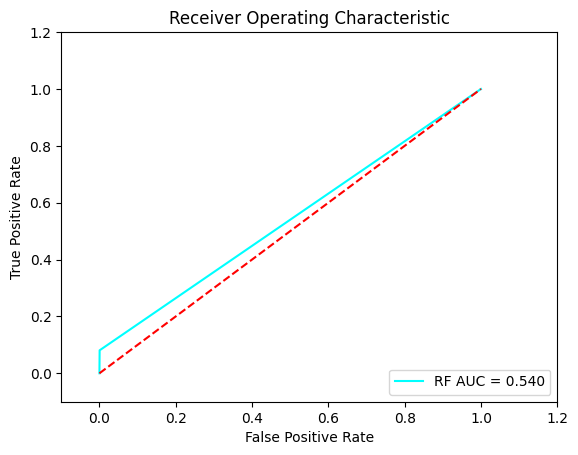

In [21]:
roc_curve_acc(Y_test, Y_pred, "RF")

In [23]:
from numpy import sort
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Fit model using each importance as a threshold
thresholds = np.sort(model_xgb.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model_xgb, threshold=thresh, prefit=False)
    select_X_train = selection.fit(x_train, y_train).transform(x_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(Y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=21, Accuracy: 99.33%
Thresh=0.000, n=21, Accuracy: 99.33%
Thresh=0.006, n=19, Accuracy: 99.33%
Thresh=0.024, n=18, Accuracy: 99.33%
Thresh=0.028, n=17, Accuracy: 99.31%
Thresh=0.033, n=16, Accuracy: 99.34%
Thresh=0.034, n=15, Accuracy: 99.32%
Thresh=0.036, n=14, Accuracy: 99.31%
Thresh=0.036, n=13, Accuracy: 99.33%
Thresh=0.039, n=12, Accuracy: 99.32%
Thresh=0.040, n=11, Accuracy: 99.31%
Thresh=0.040, n=10, Accuracy: 99.32%
Thresh=0.042, n=9, Accuracy: 99.33%
Thresh=0.051, n=8, Accuracy: 99.33%
Thresh=0.059, n=7, Accuracy: 99.31%
Thresh=0.068, n=6, Accuracy: 99.33%
Thresh=0.071, n=5, Accuracy: 99.33%
Thresh=0.084, n=4, Accuracy: 99.32%
Thresh=0.086, n=3, Accuracy: 99.32%
Thresh=0.100, n=2, Accuracy: 99.33%
Thresh=0.121, n=1, Accuracy: 99.33%


In [33]:
#Grid Search
from sklearn.model_selection import GridSearchCV, train_test_split

# Định nghĩa mô hình XGBoost
model_xgb1 = xgb.XGBClassifier()

# Định nghĩa lưới các giá trị tham số cần tìm kiếm
param_grid = {
    'max_depth': [3,4,5,6,7]
}

# Sử dụng Grid Search với phương pháp train-test set
grid_search = GridSearchCV(estimator=model_xgb1, param_grid=param_grid, scoring='accuracy')
grid_search.fit(x_train, y_train)

# In ra kết quả tốt nhất và các giá trị tham số tương ứng
print("Best accuracy:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
print("Grid search results:")
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print("Accuracy:", mean_score, "Parameters:", params)

Best accuracy: 0.9936019830094258
Best parameters: {'max_depth': 4}
Grid search results:
Accuracy: 0.9935220080016032 Parameters: {'max_depth': 3}
Accuracy: 0.9936019830094258 Parameters: {'max_depth': 4}
Accuracy: 0.993467025620952 Parameters: {'max_depth': 5}
Accuracy: 0.9935320060018782 Parameters: {'max_depth': 6}
Accuracy: 0.9934870193729075 Parameters: {'max_depth': 7}


In [34]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import numpy as np

# Định nghĩa mô hình XGBoost
model_xgb2 = xgb.XGBClassifier()

# Định nghĩa lưới các giá trị tham số cần tìm kiếm
param_grid = {
    'max_depth': np.arange(3, 8),
}

# Sử dụng Random Search với phương pháp train-test set
random_search = RandomizedSearchCV(estimator=model_xgb, param_distributions=param_grid, scoring='accuracy', n_iter=3)
random_search.fit(x_train, y_train)

# In ra kết quả tốt nhất và các giá trị tham số tương ứng
print("Best accuracy:", random_search.best_score_)
print("Best parameters:", random_search.best_params_)
print("Random search results:")
for mean_score, params in zip(random_search.cv_results_['mean_test_score'], random_search.cv_results_['params']):
    print("Accuracy:", mean_score, "Parameters:", params)


Best accuracy: 0.9936019830094258
Best parameters: {'max_depth': 4}
Random search results:
Accuracy: 0.9935220080016032 Parameters: {'max_depth': 3}
Accuracy: 0.9936019830094258 Parameters: {'max_depth': 4}
Accuracy: 0.9935320060018782 Parameters: {'max_depth': 6}


In [29]:
#Bayesian Optimization
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np
from bayes_opt import BayesianOptimization

# Định nghĩa hàm mục tiêu
def xgb_cv(max_depth):
    model_xgb = xgb.XGBClassifier(max_depth=int(max_depth), random_state=42)
    scores = cross_val_score(model_xgb, x_train, y_train, cv=5, scoring='accuracy')
    return scores.mean()

# Định nghĩa không gian tìm kiếm cho các tham số
pbounds = {'max_depth': (3, 7)}

# Tạo đối tượng Bayesian Optimization và tìm kiếm giá trị tối ưu
optimizer = BayesianOptimization(f=xgb_cv, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=10)

# In ra kết quả tối ưu
print("Best accuracy:", optimizer.max['target'])
print("Best parameters:", optimizer.max['params'])



|   iter    |  target   | max_depth |
-------------------------------------
| 1         | 0.9936    | 4.498     |
| 2         | 0.9935    | 6.803     |
| 3         | 0.9935    | 5.928     |
| 4         | 0.9935    | 5.395     |
| 5         | 0.9935    | 3.624     |
| 6         | 0.9936    | 4.445     |
| 7         | 0.9935    | 3.0       |
| 8         | 0.9936    | 4.161     |
| 9         | 0.9936    | 4.498     |
| 10        | 0.9936    | 4.788     |
| 11        | 0.9936    | 4.674     |
| 12        | 0.9936    | 4.271     |
| 13        | 0.9936    | 4.031     |
| 14        | 0.9936    | 4.9       |
| 15        | 0.9936    | 4.086     |
Best accuracy: 0.9936019830094258
Best parameters: {'max_depth': 4.49816047538945}


In [32]:
#Early stopping
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra


# Định nghĩa mô hình XGBoost
model_xgb3 = xgb.XGBClassifier(max_depth=4,early_stopping_rounds=10)

# Huấn luyện mô hình với early stopping
model_xgb3.fit(x_train, y_train, eval_set=[(X_test, Y_test)], verbose=False)

# Dự đoán trên tập kiểm tra
y_pred3 = model_xgb3.predict(X_test)

# Đánh giá độ chính xác
accuracy3 = accuracy_score(Y_test, y_pred3)
print("Accuracy:", accuracy3)


Accuracy: 0.9934420985284709


In [35]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np

# Định nghĩa tham số max_depth
max_depth_values = [3, 4, 5, 6, 7]

# Sử dụng K-Fold Cross Validation
cv_scores = []
for max_depth in max_depth_values:
    model_xgb.set_params(max_depth=max_depth)
    scores = cross_val_score(model_xgb, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# In ra kết quả
for max_depth, score in zip(max_depth_values, cv_scores):
    print("Max Depth:", max_depth, "Accuracy:", score)


Max Depth: 3 Accuracy: 0.9935220080016032
Max Depth: 4 Accuracy: 0.9936019830094258
Max Depth: 5 Accuracy: 0.993467025620952
Max Depth: 6 Accuracy: 0.9935320060018782
Max Depth: 7 Accuracy: 0.9934870193729075


In [37]:
#Grid Search

# Định nghĩa lưới các giá trị tham số cần tìm kiếm
param_grid = {
    'max_depth': [3,4,5,6,7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100,110,120,130,140,150]
}

# Sử dụng Grid Search với phương pháp train-test set
grid_search = GridSearchCV(estimator=model_xgb1, param_grid=param_grid, scoring='accuracy')
grid_search.fit(x_train, y_train)

# In ra kết quả tốt nhất và các giá trị tham số tương ứng
print("Best accuracy:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
print("Grid search results:")
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print("Accuracy:", mean_score, "Parameters:", params)

Best accuracy: 0.9936669632654302
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 120}
Grid search results:
Accuracy: 0.9935769915065518 Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.9935669945056519 Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 110}
Accuracy: 0.9935569978795181 Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 120}
Accuracy: 0.9935470007536964 Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 130}
Accuracy: 0.9935519990043025 Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 140}
Accuracy: 0.9935519988793805 Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Accuracy: 0.9936069818846415 Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Accuracy: 0.9936119803850912 Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 110}
Accuracy: 0.993606982384329 Parameters: {'learning_rate': 0.